In [4]:
from PIL import Image
import tensorflow as tf
import numpy as np
import onnxruntime as ort
import cv2 as cv
import matplotlib.pyplot as plt
import os

# Load Model

In [5]:
model_dir = 'models/shapev4.onnx'
ort_sess = ort.InferenceSession(model_dir, providers = ['CUDAExecutionProvider'])

# Input Image directory and files

In [6]:
img_dir = 'images'
print(os.listdir(img_dir))

['flightimage1.png', 'labcropped.png', 'resized1.jpg', 'testreal1.png']


# Function for inference

In [114]:

def model_inference(img, ort_sess):
    """
    Function takes in an image and run inference with the loaded model

    Input : image
    Output : drawn inferences list of images

    """
    results = list()
    model_input = tf.keras.preprocessing.image.img_to_array(img)[np.newaxis,:,:,:]
    outputs = ort_sess.run(None, {'images': model_input.astype(np.uint8)})
    boxes_5 = []
    for rect_idx in range(5):
        img = cv.rectangle(
            img=model_input[0], 
            pt1=np.flip(outputs[0][0][rect_idx][0:2].astype(int)), 
            pt2=np.flip(outputs[0][0][rect_idx][2:].astype(int)), 
            color=(255,0,0))
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        #img.astype(int)
        img /= 255.0
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        results.append(img)
        #results.append(img)
    return results

# Run Inference for all files in directory

In [115]:
steps = 0
all_inferences = list()
results = list()
for fname in os.listdir(img_dir):
    steps += 1
    img = Image.open(f'{img_dir}/{fname}')
    results += model_inference(img, ort_sess)
    print("TEST")
    print(results[-1].shape)
    #print(results.shape)
    #all_inferences += results
print(steps)

TEST
(448, 448, 3)
TEST
(448, 448, 3)
TEST
(448, 448, 3)
TEST
(451, 436, 3)
4


[[0.38039216 0.29803923 0.25490198]
 [0.36862746 0.29411766 0.24705882]
 [0.37254903 0.30980393 0.25882354]
 ...
 [0.27058825 0.28235295 0.3137255 ]
 [0.2784314  0.2784314  0.3137255 ]
 [0.28235295 0.28627452 0.31764707]]
[[0.38039216 0.29803923 0.25490198]
 [0.36862746 0.29411766 0.24705882]
 [0.37254903 0.30980393 0.25882354]
 ...
 [0.27058825 0.28235295 0.3137255 ]
 [0.2784314  0.2784314  0.3137255 ]
 [0.28235295 0.28627452 0.31764707]]
[[0.38039216 0.29803923 0.25490198]
 [0.36862746 0.29411766 0.24705882]
 [0.37254903 0.30980393 0.25882354]
 ...
 [0.27058825 0.28235295 0.3137255 ]
 [0.2784314  0.2784314  0.3137255 ]
 [0.28235295 0.28627452 0.31764707]]
[[0.38039216 0.29803923 0.25490198]
 [0.36862746 0.29411766 0.24705882]
 [0.37254903 0.30980393 0.25882354]
 ...
 [0.27058825 0.28235295 0.3137255 ]
 [0.2784314  0.2784314  0.3137255 ]
 [0.28235295 0.28627452 0.31764707]]
[[0.38039216 0.29803923 0.25490198]
 [0.36862746 0.29411766 0.24705882]
 [0.37254903 0.30980393 0.25882354]
 ...

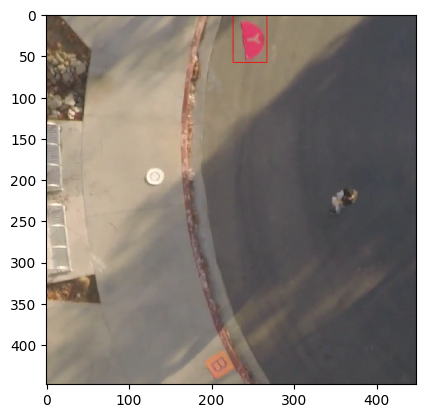

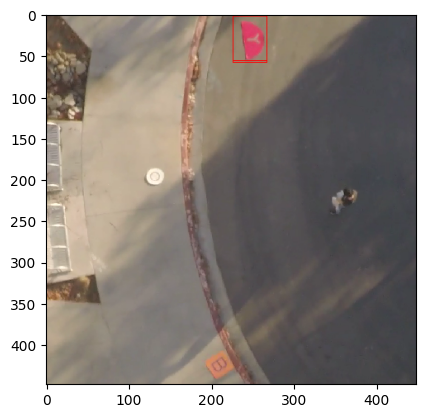

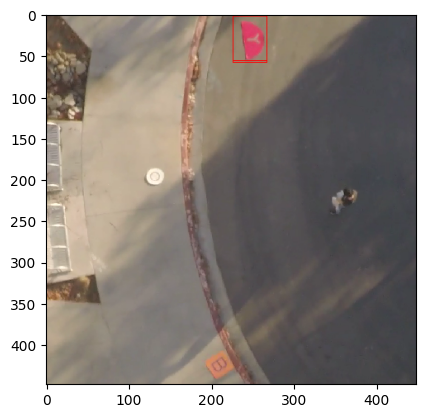

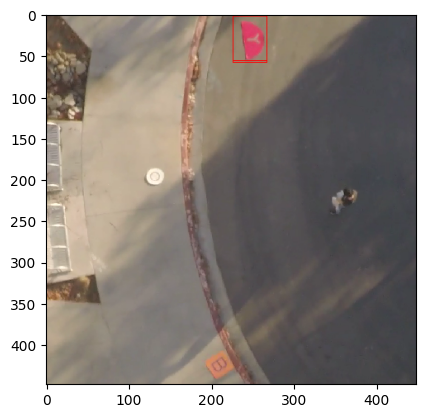

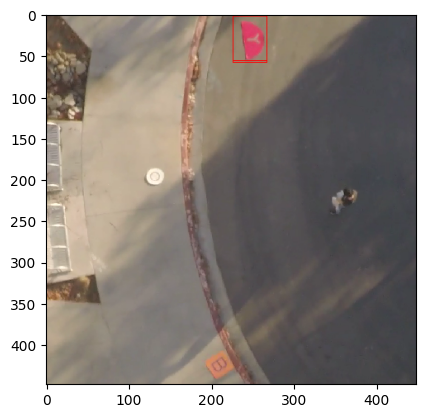

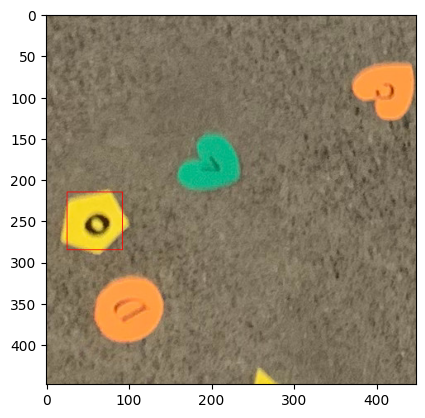

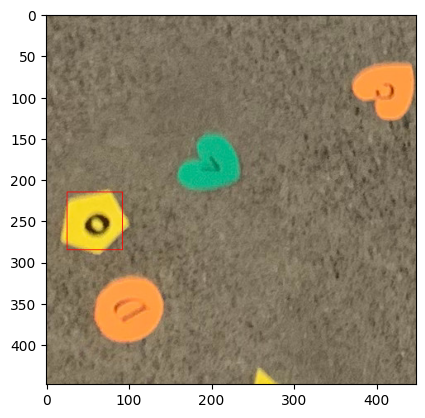

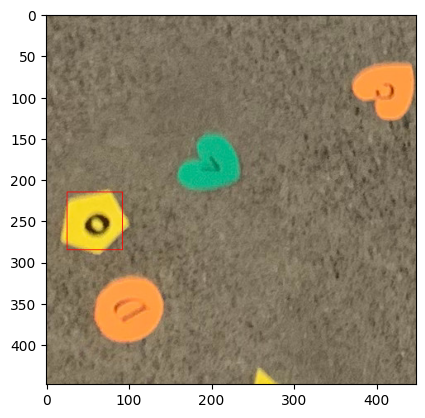

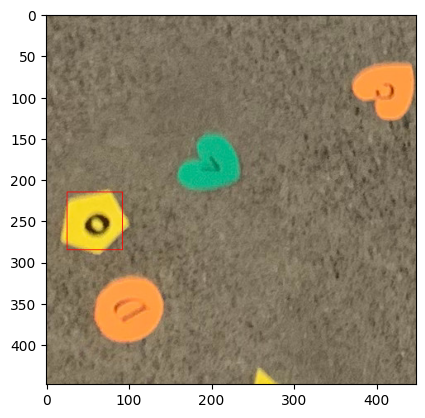

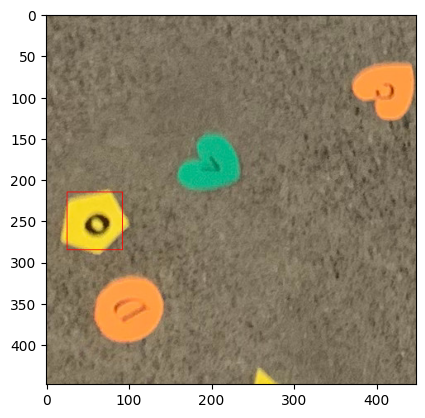

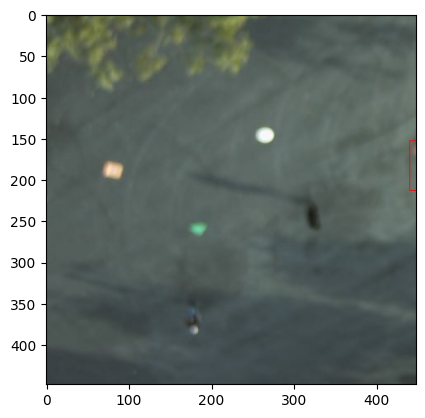

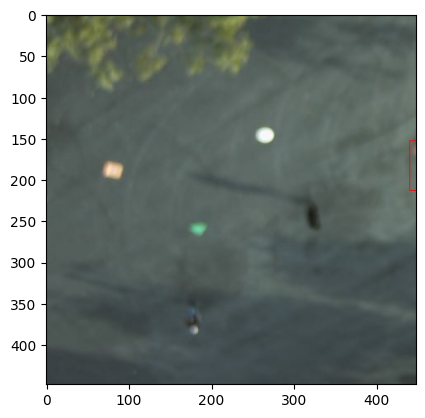

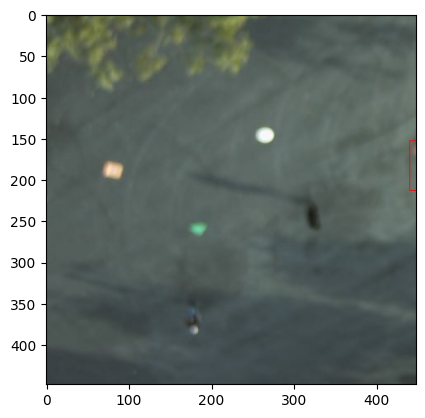

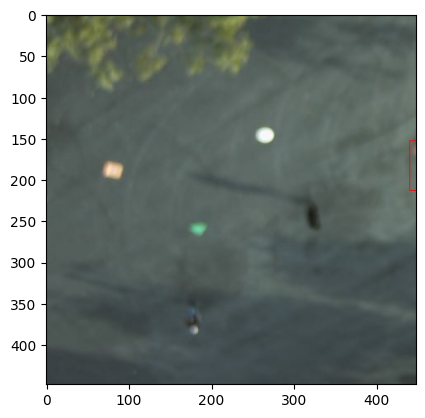

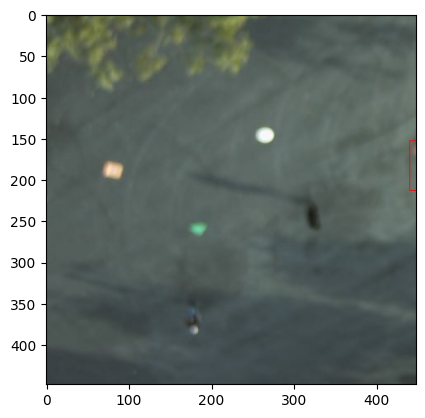

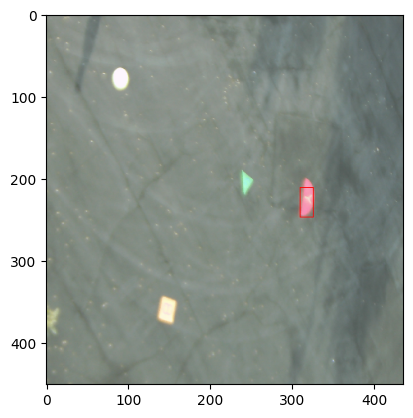

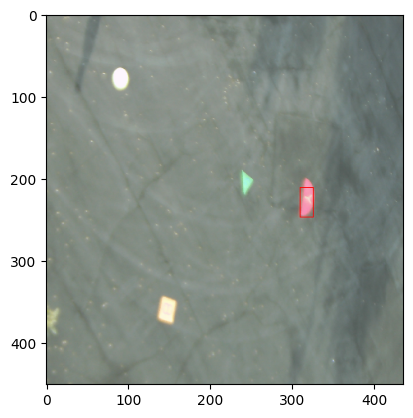

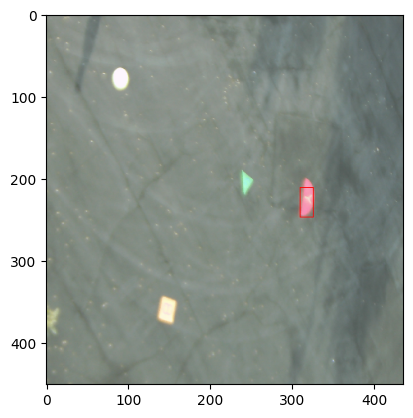

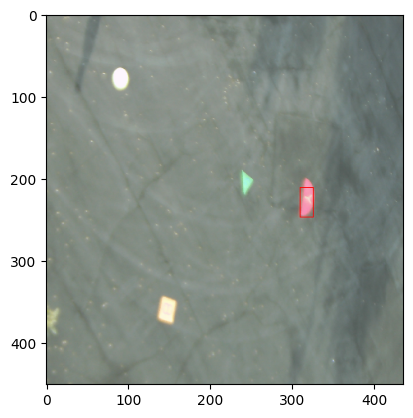

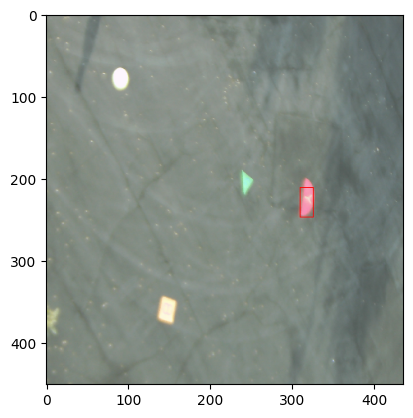

In [116]:
import math
plotside = math.ceil(math.sqrt(len(all_inferences)))

for i, inf in enumerate(results):
    print(inf[1])
    plt.figure()
    plt.imshow(inf)

In [91]:
for i,fname in enumerate(['flightimage0.png','flightimage1.png','flightimage2.jpg', 'flightimage3.jpg']):
    img = Image.open(fname)
    model_input = tf.keras.preprocessing.image.img_to_array(img)[np.newaxis,:,:,:]
    outputs = ort_sess.run(None, {'images': model_input.astype(np.uint8)})
    boxes_5 = []
    for rect_idx in range(5):
        img = cv.rectangle(
            img=model_input[0], 
            pt1=np.flip(outputs[0][0][rect_idx][0:2].astype(int)), 
            pt2=np.flip(outputs[0][0][rect_idx][2:].astype(int)), 
            color=(255,0,0))
        plt.subplot(220+i+1)
        plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'flightimage0.png'

In [ ]:
outputs = ort_sess.run(None, {'images': model_input.astype(np.uint8)})